# COMPSCI 714 - Assignment 1

This assignment will evaluate the content covered in weeks 1 & 2. This assignment aims at evaluating your coding skills, aligned with what we covered in the lectutorials, but also your critical thinking and self-learning abilities with a few more advanced questions.

**Name**: Fan(Ryan) Zhang

**UPI**: fzha836

**Student ID**: 430587739

## **Part 1: Data loading, exploration, cleaning and pre-processing** - 17 marks

Some of the libraries useful to this part are found in the following cell. You might need to import some more yourself for some of the tasks.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from pathlib import Path
import io
import requests
import math

# Change default setting of displaying columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### **Task 1: Load the dataset** - 1 mark
The dataset used in the assignment contains multiple attributes of houses and their target sale price stored in `SalePrice`. \
You can find information about each attribute in the "Housing Price Data Dictionnary.txt" file.

**Task deliverable**:
- Load the dataset contained in the file *house_prices.csv* as a Pandas DataFrame in a variable called `df_data`.

In [ ]:
# TODO
"""
The raw data is unzipped and saved in Ryan`s Github
Import data from Github
"""
def load_dataset_from_github():
  url = 'https://raw.githubusercontent.com/Ryan-FanZhang/CS714/b6b43552718f184b99c792480a8e597a80b43a1a/Assignment-1/house_prices.csv'
  response = requests.get(url).content
  df = pd.read_csv(io.StringIO(response.decode('utf-8')))
  return df

df_data = load_dataset_from_github()

In [ ]:
# Check dataset information
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [ ]:
# Describe data
df_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Check first 5 rows of data
# After checking, there are some columns have "?" which will be treated as missing value
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,?,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,?,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,?,?,?,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,?,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,?,?,?,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,?,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,?,?,?,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,?,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,'Wd Sdng','Wd Shng',NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,?,?,?,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,?,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,?,?,?,0,12,2008,WD,Normal,250000


In [ ]:
# Check if SalePrice has missing value
print(df_data["SalePrice"].isna().sum())

0


### **Task 2: Extract basic dataset information** - 2 marks

**Task deliverable**:

Complete the `extract_basic_info()` function which takes a tabular dataset in the form of a Pandas Dataframe as parameter, and returns a tuple containing the following information:
- The number of instances in the dataset.
- The total number of attributes in the dataset.
- The number of numerical attributes.
- The number of categorical attributes.
- The total memory size of the dataset.

The order of the elements in the returned tuple should follow the same order as follow: (number of instances, totoal number of attributes, number of numerical attributes, number of categorical attributes, total memory size).

**Remarks**:
- For this task, we define a numerical attribute as an attribute having numeric values. These values could represent a continuous or categorical attribute. Contrastively, we define a symbolic attribute as an attribute having non-numeric values.
- During grading, your function will be tested with the dataset previously loaded, but also with other hidden datasets. Make sure to test it to make sure it works fine on a few other datasets.

In [ ]:
"""
Define a function to extract basic infomation
-- The number of instances in the dataset.
-- The total number of attributes in the dataset.
-- The number of numerical attributes.
-- The number of categorical attributes.
-- The total memory size of the dataset.
"""
def extract_basic_info(df_dataset):
    # TODO
    # Get The number of instances in the dataset
    print(f"The Number of Instances: {df_dataset.shape[0]}")
    # The total number of attributes in the dataset.
    print(f"The Total Number of Attributes: {df_dataset.shape[1]}")
    # The number of numerical attributes.
    print(f"The Number of Numerical Attributes: {df_dataset.select_dtypes(include=['number']).shape[1]}")
    # The number of categorical attributes.
    print(f"The Number of Categorical Attributes: {df_dataset.select_dtypes(include=['object']).shape[1]}")
    # The total memory size of the dataset.
    print(f"The total memory size of the dataset: {df_dataset.memory_usage(index=True).sum()}")




In [ ]:
# Print results above
extract_basic_info(df_data)

The Number of Instances: 1460
The Total Number of Attributes: 82
The Number of Numerical Attributes: 35
The Number of Categorical Attributes: 46
The total memory size of the dataset: 947876


### **Task 3: Basic exploration** - 2 marks

#### **Task 3.1 - Histograms of surface attributes** - 1 mark
This question is based on the dataset loaded in Task 1.

**Task deliverable**:
- Identify the 14 attributes representing areas in square feet in the dataset, and plot them as histograms.

**Remark**: Having a look in the data dictionary provided with the dataset might help.


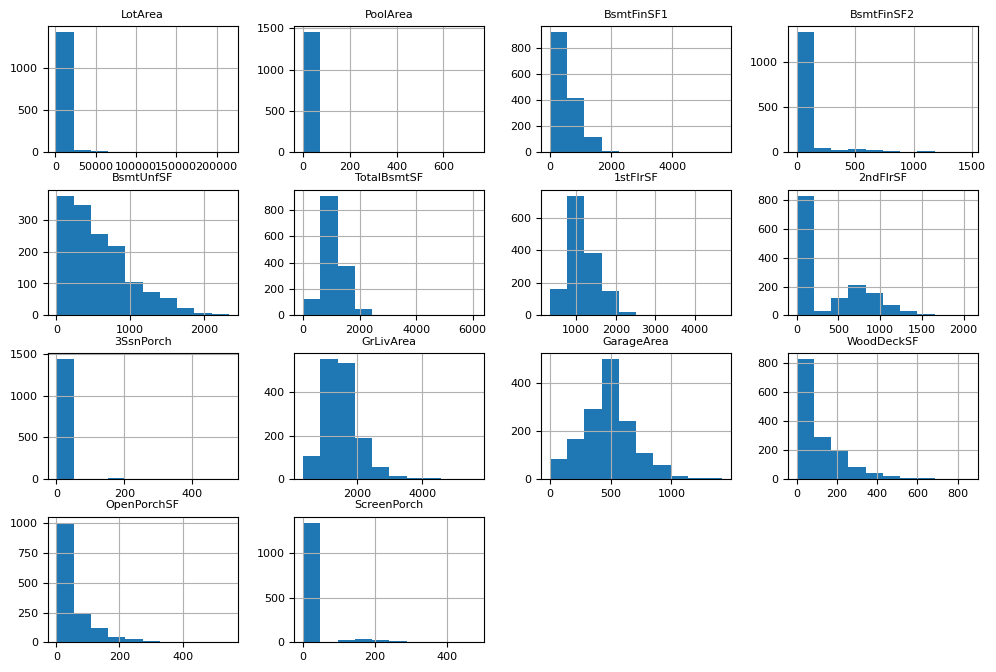

In [ ]:
# TODO
"""
Create plot chart of 14 attributes
There are 17 attributes represent areas in square feet, I picked 14 attribute as below:
"""
areas_in_square_feet_attributes = [
    'LotArea',
    'PoolArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    '3SsnPorch',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'ScreenPorch'
]

"""
Draw histogram of 14 attributes
"""
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=8)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

df_data.hist(areas_in_square_feet_attributes, figsize = (12,8))
plt.show()

#### **Task 3.2: Correlations with target** - 1 mark
**Task deliverable**:
- Display in descending order the correlation coefficients between the 14 area attributes identified previously and the target attribute `SalePrice`.

In [ ]:
# TODO
# Calcualte correlation coefficients
corr_matrix = df_data[['LotArea', 'PoolArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                       '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', '3SsnPorch', 'ScreenPorch']].corr()
corr_matrix['SalePrice'].sort_values(ascending=False).iloc[1:]

,SalePrice
GrLivArea,0.708624
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
BsmtFinSF1,0.386420
WoodDeckSF,0.324413
2ndFlrSF,0.319334
OpenPorchSF,0.315856
LotArea,0.263843
BsmtUnfSF,0.214479


### **Task 4: Splitting the data in train and test sets** - 4 marks
The dataset has a modest size, so it might be worth investigating the use of stratified sampling.

#### **Task 4.1: Selecting and preparing an attribute for the sampling** - 2 marks

**Task deliverables**:

1. Select the area attribute (from Task 3.2) with the highest correlation to the target `SalePrice`. \
Based on the selected attribute, sort the instances into 4 bins. The bins edges are defined as: [$0$, $median \times 0.5$, $median$, $median \times 1.5$, $\infty$]. \
$median$ corresponds to the median value of the previously selected area attribute's values. \
Create a new attribute corresponding to the category each instance (house) is binned into.
3. Visualise the number of instances (houses) in each category with a bar plot.

The median value of GrLivArea is: 1464.0


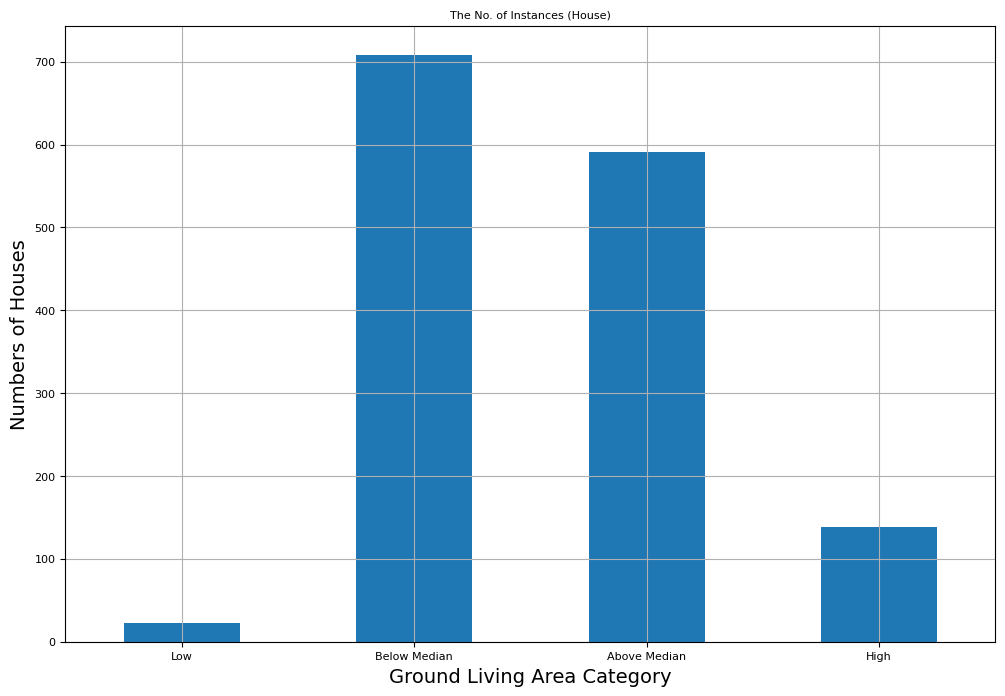

In [ ]:
# TODO
# Caulcate median value of 'GrLivArea'
median_value = df_data['GrLivArea'].median()
print(f"The median value of GrLivArea is: {median_value}")

# Sort the instances into 4 bins
bins = [0, median_value * 0.5, median_value, median_value * 1.5, np.inf]

# Create a new attribute corresponding to the category each instance (house) is binned into.
df_data['GrLivArea_Processed'] = pd.cut(df_data['GrLivArea'],
                                        bins=bins,
                                        labels=['Low', 'Below Median', 'Above Median', 'High']
                                        )

# Visualise the number of instances (houses) in each category with a bar plot.
df_data['GrLivArea_Processed'].value_counts().sort_index().plot(kind='bar',
                                                   rot = 0,
                                                   grid = True,
                                                   figsize=(12,8),
                                                   xlabel = 'Ground Living Area Category',
                                                   ylabel = 'Numbers of Houses',
                                                   title = 'The No. of Instances (House)'
                                                   )
plt.show()

#### **Task 4.2: Train/valid/test sets split using stratified sampling** - 2 marks

**Task deliverable**:

1. Split the dataset into train, validation and test sets using stratified sampling based on the the new categorical attribute you created in Task 4.1. Use a 60%/20%/20% split for train/validation/test sets.
2. Compare the proportions of instances (in percentage) for each category in:
   - the overall dataset,
   - the stratified train and test sets, and
   - randomly splitted train and test sets (without stratified sampling).
   
   Briefly explain the difference of results between stratified and random sampling. Does the choice of stratified sampling make sense in that case?

**Remark**:
- Don't forget to drop the new feature created for stratifed sampling from the training and test sets after completing this task.


In [ ]:
# TODO
from sklearn.model_selection import train_test_split

# Replace "?" with null values in df_data that found in task 1
df_data.replace('?', np.nan, inplace=True)

################################# TASK 1 #######################################

# Split train set as 60% and temp set as 40%
stratify_train_set, temp_set = train_test_split(
    df_data, test_size=0.4, stratify=df_data["GrLivArea_Processed"], random_state=42)

# Split validation set as half out of 40% and test set as half out of 40%
stratify_validation_set, stratify_test_set = train_test_split(
    temp_set, test_size=0.5, stratify=temp_set["GrLivArea_Processed"], random_state=42)

# Split train/validation/test sets randomly
train_set_random, temp_set_random = train_test_split(
    df_data, test_size = 0.4, random_state=42)

validation_set_random, test_set_random = train_test_split(
    temp_set_random, test_size = 0.5, random_state=42)

################################# TASK 1 #######################################

################################# TASK 2 #######################################

def groundLivingArea_Proportions(dataframe):
  return dataframe['GrLivArea_Processed'].value_counts() / len(dataframe)


compare_props = pd.DataFrame(
    {
    "Overall %": groundLivingArea_Proportions(df_data),
    "Stratified Train %": groundLivingArea_Proportions(stratify_train_set),
    "Stratified Test %": groundLivingArea_Proportions(stratify_test_set),
    "Random Train %": groundLivingArea_Proportions(train_set_random),
    "Random Test %": groundLivingArea_Proportions(test_set_random),
    }
).sort_index()

compare_props.index.name = 'groundLivingAreaCategory'
compare_props['Strat. Error %'] = (compare_props['Stratified Train %'] /
                                   compare_props['Overall %'] - 1)
compare_props['Rand. Error %'] = (compare_props['Random Train %'] /
                                  compare_props['Overall %'] - 1)

compare_props = (compare_props * 100).round(2)

for set in (stratify_train_set, stratify_validation_set, stratify_test_set, train_set_random, validation_set_random, test_set_random):
  set.drop(columns = ['GrLivArea_Processed'], axis=1, inplace=True)

compare_props
################################# TASK 2 #######################################

,Overall %,Stratified Train %,Stratified Test %,Random Train %,Random Test %,Strat. Error %,Rand. Error %
groundLivingAreaCategory,,,,,,,
Low,1.58,1.60,1.37,1.37,2.05,1.45,-13.04
Below Median,48.49,48.52,48.29,48.63,50.00,0.05,0.28
Above Median,40.48,40.41,40.75,40.30,40.41,-0.17,-0.45
High,9.45,9.47,9.59,9.70,7.53,0.24,2.66


###**TASK 4.2 ANSWER**###

#### **The Difference Between Stratified and Random Sampling**
##### **Stratified Sampling**
Stratified sampling ensures that the proportions of each category in the dataset remain consistent across the training, validation, and test sets. This is evident from the close alignment of values in the **"Stratified Train %",** **"Stratified Validation %"** and **"Stratified Test %"** with the **"Overall %"** . This demonstrates that stratified sampling **effectively maintains the original distribution of categories**, therefore reducing the risk of introducing bias in the dataset splits.

##### **Random Sampling**
In contrast, random sampling exhibits significant fluctuations in the distribution of smaller categories, particularly in the **"Low"** and **"High"** categories:

###### **Low Category:**
- The proportion changes from **1.58% (Overall) → 1.37% (Random Train) → 2.05% (Random Test)**.
- This variation indicates that **random sampling does not ensure a consistent distribution of less frequent categories**, leading to potential misrepresentation in training and evaluation stages.

###### **High Category:**
- The proportion shifts from **9.45% (Overall) → 9.70% (Random Train) → 7.53% (Random Test)**.
- Such inconsistency suggests that random sampling may **overrepresent or underrepresent specific categories**, which could introduce bias and impact model performance.

###### **Conclusion**
Stratified sampling is **particularly appropriate in this case** as it ensures that all categories are proportionally represented across the dataset splits.




### **Task 5: Pre-processing pipeline** - 4 marks

**Task deliverables**:
1. Build a pre-processing pipeline with:
    - Missing values handling based on median for numerical attributes and most frequent value for categorical attributes.
    - Standardisation for numerical attributes.
    - Categorical attributes encoding with one-hot encoding.

2. *Fit and apply* the pipeline to the stratified train set, without the target values (`SalePrice`). Then, *apply* the fitted pipeline to the stratified validation and test sets, without the target values.

3. Did the number of attributes in the sets change after applying this pre-processing pipeline? If yes, briefly explain why.


In [ ]:
# TODO
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

########################## TASK 1 ###########################################

# Handling Missing values based on median for numerical attributes and standardisation
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy= "median")),
    ("standardize", StandardScaler()),
])

# Handling Missing values based on most frequent values for categorical attributes and one-hot encoding
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# Defiine a helper function to select numeric attrtibutes
def select_num_attributes(dataframe):
  return dataframe.select_dtypes(include=['number']).columns

# Defiine a helper function to select category attrtibutes
def select_cat_attributes(dataframe):
  return dataframe.select_dtypes(include=['object']).columns

# Drop SalePrice from train set
stratified_train_set_wo_saleprice = stratify_train_set.drop(columns=["SalePrice"], axis=1).copy()

# Apply two helper function to select required attrtibutes
num_attributes = select_num_attributes(stratified_train_set_wo_saleprice)
cat_attributes = select_cat_attributes(stratified_train_set_wo_saleprice)

# Print results of No. of numeric and category attrtibutes
print(f"There are {len(num_attributes)} numerical attributes: {num_attributes}")
print(f"There are {len(cat_attributes)} categorical attributes: {cat_attributes}")

# Use ColumnTransformer to create a preprocessing object which contains the methods
# of dealing with numberic and category attrtibutes
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
])

########################## TASK 1 ###########################################

########################## TASK 2 ###########################################

# Fit & Apply to each dataset
prepared_train_set = preprocessing.fit_transform(stratified_train_set_wo_saleprice)
prepared_test_set = preprocessing.transform(stratify_test_set.drop(columns = 'SalePrice'))
prepared_validation_set = preprocessing.transform(stratify_validation_set.drop(columns = 'SalePrice'))

########################## TASK 2 ###########################################

# Check the No.of number attributes is changed after processing
print(f"Original Train Set Shape: {stratified_train_set_wo_saleprice.shape}")
print(f"Preprocessing Train Set Shape: {prepared_train_set.shape}")
print(f"Original Test Set Shape: {stratify_test_set.shape}")
print(f"Preprocessing Test Set Shape: {prepared_test_set.shape}")
print(f"Original Validation Set Shape: {stratify_validation_set.shape}")
print(f"Preprocessing Validation Set Shape: {prepared_validation_set.shape}")



There are 34 numerical attributes: Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], dtype='object')
There are 46 categorical attributes: Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Kitch

In [ ]:
# Change train set array to dataframe for task 6 to use
# Get feature names out
encoded_feature_names = preprocessing.get_feature_names_out()

# change to dataframe
prepared_train_df = pd.DataFrame(prepared_train_set.toarray(), columns=encoded_feature_names, index = stratified_train_set_wo_saleprice.index)

# concat dataframe
prepared_train_final_df = pd.concat([prepared_train_df, stratify_train_set["SalePrice"]], axis=1)

#  Apply same to test and valid
prepared_test_df = pd.DataFrame(prepared_test_set.toarray(), columns=encoded_feature_names, index = stratify_test_set.index)
prepared_valid_df = pd.DataFrame(prepared_validation_set.toarray(), columns=encoded_feature_names, index = stratify_validation_set.index)

prepared_test_final_df = pd.concat([prepared_test_df, stratify_test_set["SalePrice"]], axis=1)
prepared_valid_final_df = pd.concat([prepared_valid_df, stratify_validation_set["SalePrice"]], axis=1)


#### **Task 5.3 Answer**:
The main reason is due to the functionality of **One-Hot Encoding**, it will expand each categorical features into multiple dummy columns (*one for each possible category*). Therefore, the number of attrtibutes will be increased a lot compared to original dataset.

### **Task 6: Feature selection with Mutual information** - 4 marks

The previous step led to generating a lot of attributes and not all of them might be useful to build a model.
In this task, you have to perform feature selection using mutual information. Mutual information can be used to measure associations between an attribute and the target. It is similar to correlation in this way, but the advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

**Task deliverables**:

1. Using the train set only, generate a ranking of the attributes based on mutual information with the target `SalePrice`.
2. Drop the attributes with mutual information smaller than 0.01 from the train, valid and test sets.
3. Display the number of attributes which were removed during the selection.

In [ ]:
# TODO
from sklearn.feature_selection import mutual_info_regression

######################################## TASK 1 ###########################################
# Step 1
"""
Create two new datafram X_train and y_train
X_train: it has all columns without target
y_train: it has only target
"""
X_train = prepared_train_final_df.copy()
y_train = prepared_train_final_df['SalePrice'].copy()

# Step 2
"""
Calculate mutual information
"""
mutual_info_score = mutual_info_regression(X_train, y_train)

# Step 3
"""
Convert mutual information scores into a pandas Series
This helps in sorting and analyzing the most important features.
"""

mutual_info = pd.Series(mutual_info_score, index=X_train.columns)
mutual_info = mutual_info.sort_values(ascending=False)

# Step 4
"""
Identify columns with mutual information scores >= 0.01 & < 0.01

"""
selected_features = mutual_info[mutual_info >= 0.01].index
removed_features = mutual_info[mutual_info < 0.01]

# Step 5
print(mutual_info.iloc[1:].head(20))

######################################## TASK 1 ###########################################

num__OverallQual         0.535344
num__GrLivArea           0.468981
num__TotalBsmtSF         0.329635
num__YearBuilt           0.325415
num__GarageCars          0.320534
num__1stFlrSF            0.310588
num__GarageArea          0.308977
num__MSSubClass          0.280447
num__FullBath            0.254302
cat__ExterQual_TA        0.248732
num__2ndFlrSF            0.227664
cat__GarageFinish_Unf    0.221205
num__YearRemodAdd        0.221146
cat__KitchenQual_TA      0.211609
cat__ExterQual_Gd        0.205831
cat__BsmtQual_TA         0.203107
num__Fireplaces          0.173382
num__BsmtFinSF1          0.171501
cat__Foundation_PConc    0.170698
cat__KitchenQual_Gd      0.168793
dtype: float64


In [ ]:
######################################## TASK 2 ###########################################

# Select features
X_train_processed_df = X_train[selected_features]
######################################## TASK 2 ###########################################

######################################## TASK 3 ###########################################
num_removed = len(removed_features)
print(f"The number of attributes which were removed: {num_removed}")
######################################## TASK 3 ###########################################

The number of attributes which were removed: 510


## **Part 2: Training a simple neural network** - 13 marks

This second part is less guided than the first one. You are free to explore a bit more and be more creative to produce the deliverables, within a few constrains.

#### **Task 1: Build and train a neural network** - 8 marks
**Task deliverables**:
1. Build a simple neural network with 3 hidden layers and 1 output layer. There is no constrain on the number of neurons in each hidden layer, and the activation functions, but you can start with the advice below.
2. Build a training loop to train your model on the training set you produced in Part 1. Your training loop should:
   - Display the training loss and validation loss after each epoch.
   - Store the values of the training loss and validation loss after each epoch.
3. Display a plot of your training and validation losses and demonstrate that your model is learning.
4. Test your trained model by predicting a few "new" instances of the test set and comparing the predicted house value with the expected ones.


Constrains:
- You are required to use PyTorch for this task.
- You are required to use MSE as loss.

Some advice:
- You can start with 150, 75 and 20 neurons in the 3 hidden layers.
- You can use ReLu as activation functions between layers to start with.
- Try using the Adam optimiser if your network does not train well with SGD.
- It might be practical to create a function containing your training loop, as shown in the lectutorial.

In [ ]:
# TODO
# Impot packages for training sets
import torch
import torch.nn as nn
import copy
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Set Device to Cuda
if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = "mps"
else:
  device = "cpu"

In [ ]:
# Convert processed feature and target DataFrames into PyTorch FloatTensors

# X_train_processed_df, y_train
X_train_t = torch.FloatTensor(prepared_train_final_df.drop(columns = 'SalePrice').values)
y_train_t = torch.FloatTensor(y_train.values).reshape(-1, 1)

# X_validation_processed_df, y_validation
X_val_t = torch.FloatTensor(prepared_valid_final_df.drop(columns = 'SalePrice').values)
y_val_t = torch.FloatTensor(prepared_valid_final_df["SalePrice"].values).reshape(-1, 1)

# X_test_processed_df, y_test
X_test_t = torch.FloatTensor(prepared_test_final_df.drop(columns = 'SalePrice').values)
y_test_t = torch.FloatTensor(prepared_test_final_df["SalePrice"].values).reshape(-1, 1)

In [ ]:
# Using Z-score normalization to standardize the target variable (y) due to SalePrice is in a large range to increase
# efficiency of training
means = y_train_t.mean()
stds = y_train_t.std()
y_train_t_s = (y_train_t - means) / stds
y_val_t_s = (y_val_t - means) / stds
y_test_t_s = (y_test_t - means) / stds

In [ ]:
# Define a fully connected feedforward neural network using PyTorch's Sequential API
# - Input layer: number of features (n_attributes)
# - Hidden layers: 150 -> 75 -> 20 units, each followed by ReLU activation
# - Output layer: 1 unit
def set_model(n_attributes=prepared_train_final_df.drop(columns = 'SalePrice').shape[1]):
    model = nn.Sequential(
        nn.Linear(n_attributes, 150),
        nn.ReLU(),
        nn.Linear(150, 75),
        nn.ReLU(),
        nn.Linear(75, 20),
        nn.ReLU(),
        nn.Linear(20, 1)
    )
    return model

In [ ]:
# Create DataLoaders for training, validation, and test sets using TensorDataset
# - train_loader: loads batches of training data
# - valid_loader: loads batches of validation data
# - test_loader: loads batches of test data
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t_s), batch_size=64, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_val_t, y_val_t_s), batch_size=64, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t_s), batch_size=64, shuffle=False)

In [ ]:
# Train this model using a learning rate scheduler and early stopping.

def train_with_scheduler_and_early_stopping(model, optimizer, scheduler, loss_fn, train_loader, valid_loader, n_epochs=100, patience=10, min_delta=0.0, device='cuda'):
    train_losses = []
    valid_losses = []
    lr_history = []

    best_val_loss = float('inf')
    best_epoch = 0
    epochs_no_improve = 0

    best_model_state = copy.deepcopy(model.state_dict())

    for epoch in range(n_epochs):
        # === Training ===
        model.train()
        epoch_train_loss = 0.0

        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            y_train_pred = model(X_train_batch)
            train_loss = loss_fn(y_train_pred, y_train_batch)

            train_loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            epoch_train_loss += train_loss.item()

        mean_train_loss = epoch_train_loss / len(train_loader)
        train_losses.append(mean_train_loss)

        # Scheduler update for every epoch
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        lr_history.append(after_lr)

        # === Validation ===
        model.eval()
        epoch_valid_loss = 0.0
        with torch.no_grad():
            for X_valid_batch, y_valid_batch in valid_loader:
                X_valid_batch, y_valid_batch = (
                    X_valid_batch.to(device),
                    y_valid_batch.to(device)
                )
                y_valid_pred = model(X_valid_batch)
                valid_loss = loss_fn(y_valid_pred, y_valid_batch)
                epoch_valid_loss += valid_loss.item()

        mean_valid_loss = epoch_valid_loss / len(valid_loader)
        valid_losses.append(mean_valid_loss)

        print(f"Epoch {epoch+1}/{n_epochs}, "
              f"Train Loss: {mean_train_loss:.4f}, "
              f"Valid Loss: {mean_valid_loss:.4f}, "
              f"LR: {before_lr:.6f} → {after_lr:.6f}")

        # === Early Stopping Check ===

        if (best_val_loss - mean_valid_loss) > min_delta:
            best_val_loss = mean_valid_loss
            best_epoch = epoch
            epochs_no_improve = 0
            best_model_state = copy.deepcopy(model.state_dict())
        else:
            epochs_no_improve += 1

        if epochs_no_improve == patience:
            print(f"\nEarly stopping at epoch {epoch+1}")
            print(f"Best valid loss was {best_val_loss:.4f} at epoch {best_epoch+1}")
            break

    model.load_state_dict(best_model_state)

    return train_losses, valid_losses, lr_history


In [ ]:
# Initial the model
model = set_model().to(device)
learning_rate = 0.03
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.LinearLR(
    optimizer,
    start_factor=1.0,
    end_factor=0.5,
    total_iters=20
)
loss_fn = nn.MSELoss()

# Get Results of training losses and valid losses
train_losses, valid_losses, lr_history = train_with_scheduler_and_early_stopping(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    loss_fn=loss_fn,
    train_loader=train_loader,
    valid_loader=valid_loader,
    n_epochs=500,
    patience=10,
    min_delta=0.0,
    device=device
)


Epoch 1/500, Train Loss: 1.1117, Valid Loss: 0.4091, LR: 0.030000 → 0.029250
Epoch 2/500, Train Loss: 0.4903, Valid Loss: 0.1151, LR: 0.029250 → 0.028500
Epoch 3/500, Train Loss: 0.2065, Valid Loss: 0.1081, LR: 0.028500 → 0.027750
Epoch 4/500, Train Loss: 0.1179, Valid Loss: 0.1508, LR: 0.027750 → 0.027000
Epoch 5/500, Train Loss: 0.1410, Valid Loss: 0.1545, LR: 0.027000 → 0.026250
Epoch 6/500, Train Loss: 0.0595, Valid Loss: 0.1338, LR: 0.026250 → 0.025500
Epoch 7/500, Train Loss: 0.0393, Valid Loss: 0.1171, LR: 0.025500 → 0.024750
Epoch 8/500, Train Loss: 0.0313, Valid Loss: 0.1113, LR: 0.024750 → 0.024000
Epoch 9/500, Train Loss: 0.0258, Valid Loss: 0.1067, LR: 0.024000 → 0.023250
Epoch 10/500, Train Loss: 0.0224, Valid Loss: 0.1085, LR: 0.023250 → 0.022500
Epoch 11/500, Train Loss: 0.0189, Valid Loss: 0.0966, LR: 0.022500 → 0.021750
Epoch 12/500, Train Loss: 0.0144, Valid Loss: 0.0996, LR: 0.021750 → 0.021000
Epoch 13/500, Train Loss: 0.0138, Valid Loss: 0.1007, LR: 0.021000 → 0.02

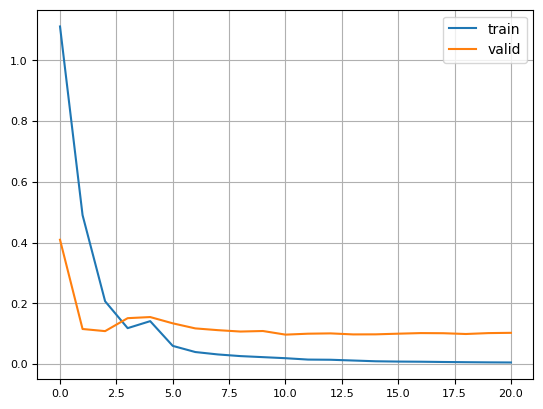

In [ ]:
# Check the learning rate between train and valid datasets
plt.plot(train_losses, label = 'train')
plt.plot(valid_losses, label = 'valid')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Helper function to denormalize predictions (reverse the Z-score transformation of y_train)
def denormalize(data, mean, std):
    return data * std.item() + mean.item()

# Function to evaluate the trained model performance on the test set
def test(model, test_loader, device, mean, std):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X_test_batch, y_test_batch in test_loader:
            X_test_batch = X_test_batch.to(device)
            y_test_batch = y_test_batch.to(device)

            y_pred = model(X_test_batch)

            y_pred_cpu = y_pred.detach().cpu().numpy().flatten()
            y_test_cpu = y_test_batch.detach().cpu().numpy().flatten()

            y_pred_real = denormalize(y_pred_cpu, mean, std)
            y_test_real = denormalize(y_test_cpu, mean, std)

            all_preds.extend(y_pred_real)
            all_targets.extend(y_test_real)

    df_results = pd.DataFrame({'Predicted_Value': all_preds, 'Actual_Value': all_targets})

    return df_results


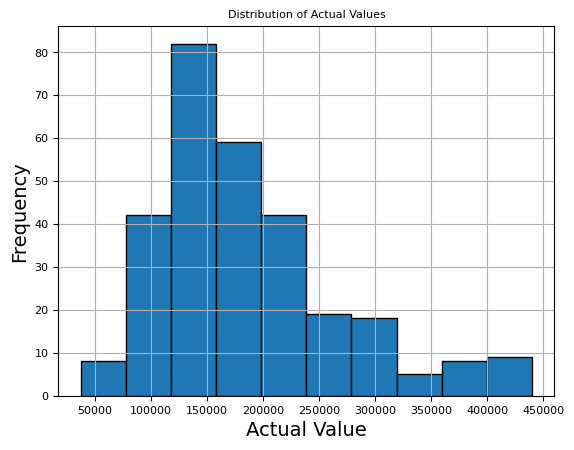

,Predicted_Value,Actual_Value,Variance,Label_Desc
0,196847.65625,204000.0,7152.34375,200k-300k
1,230003.43750,223500.0,-6503.43750,200k-300k
2,118202.37500,117500.0,-702.37500,100k-200k
3,180065.25000,181500.0,1434.75000,100k-200k
4,407312.43750,402861.0,-4451.43750,400k+


In [ ]:
# Check the Predicted Value Vs. Actual Value
df_results = test(model, test_loader, device, y_train_t.mean(), y_train_t.std())

# Check the Actual Value distribution
plt.hist(df_results['Actual_Value'], bins=10, edgecolor='black')
plt.title('Distribution of Actual Values')
plt.xlabel('Actual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Compare Actual Values VS. Predicted Values
# Set labels to each range
bins = [0, 100000, 200000, 300000, 400000, 500000]
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k+']


df_results['Variance'] = df_results['Actual_Value'] - df_results['Predicted_Value']

df_results['Label_Desc'] = pd.cut(df_results['Actual_Value'],
                                  bins=bins,
                                  labels=labels)

df_results.head()

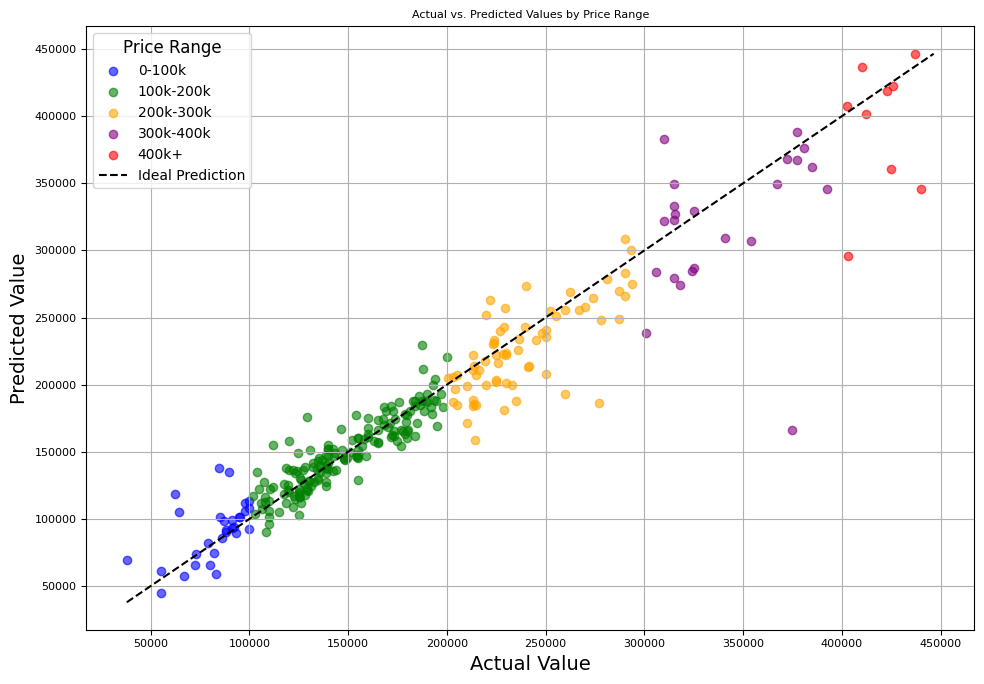

In [ ]:
# Set Color for each labels
colors = ['blue', 'green', 'orange', 'purple', 'red']
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k+']

plt.figure(figsize=(10, 7))

# Draw scatter plot
for label, color in zip(labels, colors):
    subset = df_results[df_results['Label_Desc'] == label]
    plt.scatter(subset['Actual_Value'], subset['Predicted_Value'],
                label=label, alpha=0.6, color=color)

# Set Ideal Prediction Line
min_val = min(df_results['Actual_Value'].min(), df_results['Predicted_Value'].min())
max_val = max(df_results['Actual_Value'].max(), df_results['Predicted_Value'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'black', linestyle='--', label='Ideal Prediction')


plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values by Price Range')
plt.legend(title='Price Range')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calcualte the evaluation metrics
"""
-- RMSE (Root Mean Squared Error)
-- MAE (Mean Absolute Error)
-- R² (R-squared)
"""
rmse = np.sqrt(mean_squared_error(df_results['Actual_Value'], df_results['Predicted_Value']))

mae = mean_absolute_error(df_results['Actual_Value'], df_results['Predicted_Value'])

r2 = r2_score(df_results['Actual_Value'], df_results['Predicted_Value'])

In [ ]:
# Check evaluation metrics
mean_y = y_train_t.mean().item()

print(f"The mean value of SalePrice: {mean_y}")
print(f"The RMSE value: {rmse}")
print(f"The MAE value: {mae}")
print("R2 Score:", r2)

rmse_relative = (rmse / mean_y) * 100
mae_relative = (mae / mean_y) * 100

print(f"RMSE as a percentage of the mean: {rmse_relative:.2f}%")
print(f"MAE as a percentage of the mean: {mae_relative:.2f}%")

The mean value of SalePrice: 179389.8125
The RMSE value: 24464.91561399712
The MAE value: 14874.677734375
R2 Score: 0.911108672618866
RMSE as a percentage of the mean: 13.64%
MAE as a percentage of the mean: 8.29%


#### **Task 2: Report on your model** - 5 marks

**Task deliverables**:
- Write a brief report (max. 300 words), answering the following questions:
    - What do you think about the performance of your model training in Task 1?
    - What could you try to do to improve the predictive performance of your model?
    - What did you find the most challenging when training the model and how did you solve it?


Write your report here (max. 300 words).

#### Report on Model Training - Task 1

##### **Performance of The Model**
Overall, the model shows a reasonable level of accuracy in predicting sale prices.
- **MAE of 13.64% ($14,875)** shows predictions are generally close to actual values.
- **RMSE of 8.29% ($24,465)** reveals sensitivity to large errors, especially in high-value properties.
- ***R² of 0.91 means 91%*** of the sale price variance is explained by the model.
- The scatter plot shows good performance for low-to-mid price ranges, with reduced accuracy for high-priced properties, consistent with RMSE.


##### **The Ways of Improvement**
1. The model Replacement
    - Considering more advanced models like XGBoost, RandomForest, or LightGBM.

2. Data Preprocessing - Numeric Attributes & Category Attributes

    - Using **Min-Max Scaling** for skewed numerical features (observed in Task 3 histograms).
    - Leveraging different encoding methods to deal with different category attributes.

3. Optimisation in the Model Training Phase
    - Adjusting the learning rate dynamically by leveraging other approcahes, e.g. `cyclical` or `one-cycle`
    - Updating Activation Function, E.g. Replace `ReLu()` with `Leaky ReLu()`
    - Enhancing Regularization (`L1&L2 Regularization` and `Dropout`)
    - Updating the Loss function to `nn.SmoothL1Loss` as `MSELoss` is significantly and negatively influenced by large errors.

##### **The Challenging of Model Training**
Challenging 1:
- How to interpreting evaluation metrics

Solution: 
- The online learning materials provided me with a complete picture of how to estimate the model performance. And also went through some competitions in Kaggle to understand how others evaluate the model.

Challenging 2:
-  Large loss values due to unscaled targets (y_train)

Solution:
- As `SalePrice` is typically in thousands, which led MSE big because it squares the error. In terms of dealing with this issue, the method applied here was that reading relevant literature and consulting ChatGPT to understand the mathmatics principles.








